In [23]:
# Patch to remove log values from the colorbar on the hexbin plot
from matplotlib.ticker import LogFormatter 
class LogFormatterHB(LogFormatter):
     def __call__(self, v, pos=None):
         vv = self._base ** v
         return LogFormatter.__call__(self, vv, pos) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

fpath='../比赛/轨迹数据.txt'

In [2]:
df=pd.read_csv(fpath)#轨迹数据.txt 格式有问题，每个行尾多了个，号

In [13]:
df.size,len(df)#行数

(3656370, 609395)

In [8]:
df.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0


In [37]:
# df.tail()

In [15]:
a=df['vehicle-id']
len(a.unique())#多少辆车

5415

In [39]:
#category类别，载客状态 载客=1，非载客=0 
cat=df['category']
cl=list(cat)

In [41]:
c=Counter(cl)
c

Counter({0: 63821, 1: 545574})

In [19]:
df[['x-coordinate','y-coordinate']].head()

,x-coordinate,y-coordinate
0,521696.473915,55061.506951
1,521680.892788,55051.685121
2,521665.311690,55041.863291
3,521648.617687,55030.255674
4,521628.584926,55019.540951


In [15]:
x=list(df['x-coordinate'])
#x[:10]
y=list(df['y-coordinate'])
#y[:10]

In [16]:
# print( "Plotting position density...")
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
xmin, xmax,ymin, ymax

(520955.28881400003,
 521920.17750699999,
 53380.188236000002,
 58715.227708000006)

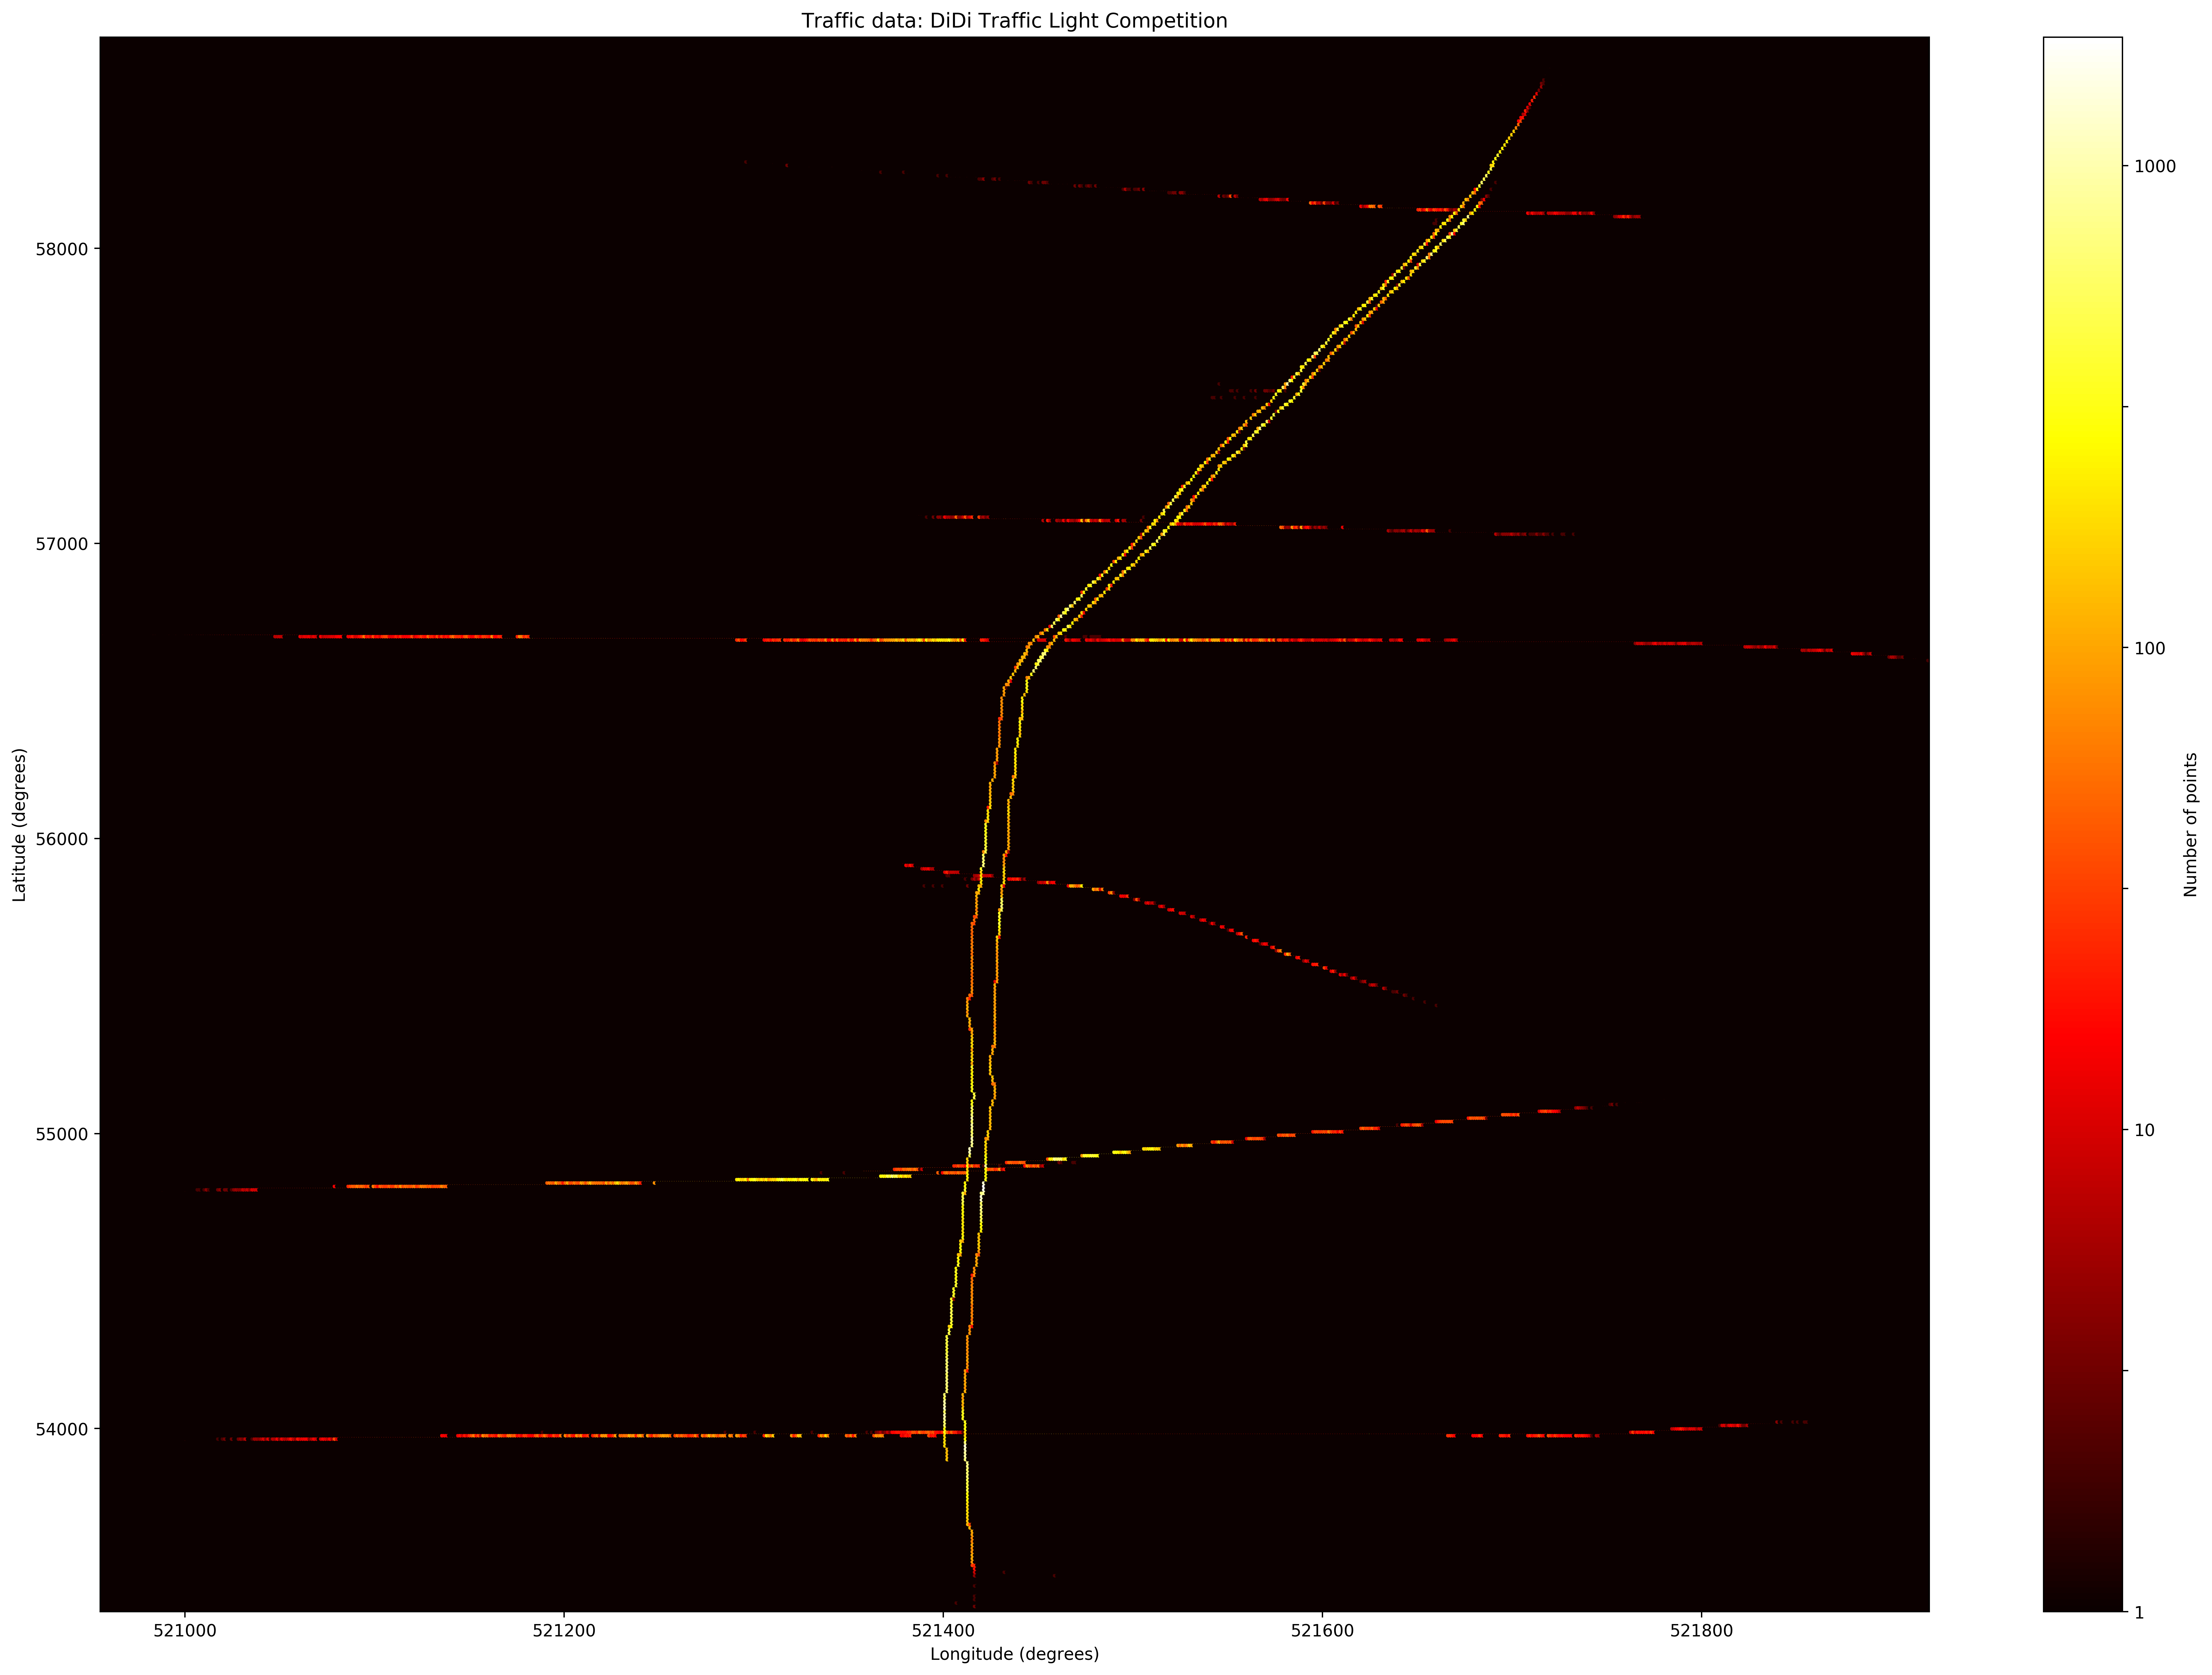

In [32]:
#%% Plot position density -- Overview 

# window = data[(xmin < data.longitude) & (data.longitude < xmax) & \
#             (ymin < data.latitude) & ( data.latitude < ymax)]

# x = np.array(window.longitude)
# y = np.array(window.latitude)

plt.figure(figsize = (20,14), dpi=350)#高清大图
plt.hexbin(x,y,bins='log', gridsize=800, cmap=plt.cm.hot)   # black -> red > white
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Traffic data: DiDi Traffic Light Competition")
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

cb = plt.colorbar(format=LogFormatterHB())
cb.set_label('Number of points')

plt.tight_layout()
plt.show()

In [34]:
# plt.savefig("DiDi Traffic Light map.png")#不行

In [36]:
#模板方案
lights='0,111,9,43,37;10,28,121,13,38;10,28,134,38;10,34,75,31,19,41;134,48,89,63;105,35,67,52,46;52,30,96,74'.split(';')
lights,len(lights)#7个十字路口

(['0,111,9,43,37',
  '10,28,121,13,38',
  '10,28,134,38',
  '10,34,75,31,19,41',
  '134,48,89,63',
  '105,35,67,52,46',
  '52,30,96,74'],
 7)

In [3]:
#十字路口坐标
cross_cord={'1':{'x':521677,'y':58109},
           '2':{'x':521580,'y':57466},
            '3':{'x':521520,'y':57059},
            '4':{'x':521452,'y':56668},
            '5':{'x':521433,'y':55855},
            '6':{'x':521411,'y':54822},
            '7':{'x':521400,'y':53998}
           }
#TODO 把【坐标】和【相位时长】结合起来

In [12]:
cx=[];cy=[]
for z in range(1,8):
#     print(z)
    cx.append(cross_cord[str(z)]['x'])
    cy.append(cross_cord[str(z)]['y'])
print(cx,cy)

[521677, 521580, 521520, 521452, 521433, 521411, 521400] [58109, 57466, 57059, 56668, 55855, 54822, 53998]


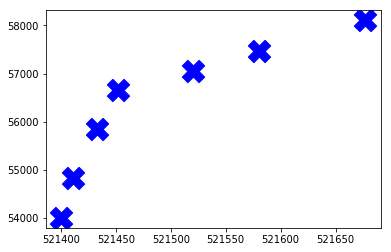

In [19]:
plt.scatter(cx,cy, 500, color ='blue',marker='X')
plt.show()

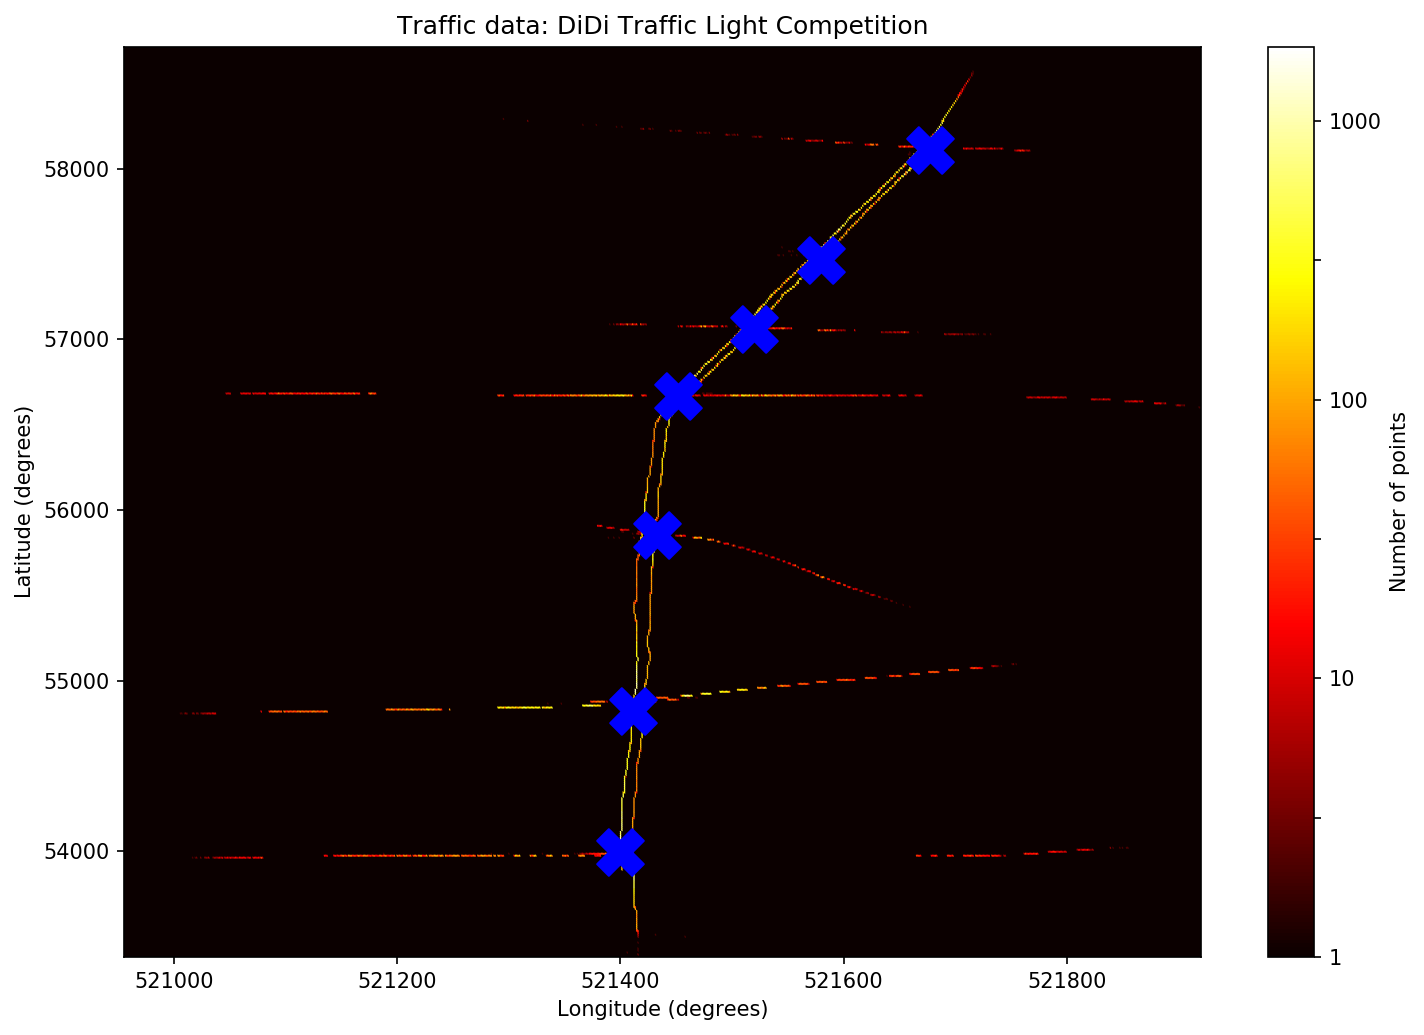

In [25]:
#%% Plot position density -- Overview 

# window = data[(xmin < data.longitude) & (data.longitude < xmax) & \
#             (ymin < data.latitude) & ( data.latitude < ymax)]

# x = np.array(window.longitude)
# y = np.array(window.latitude)

plt.figure(figsize = (10,7), dpi=150)
# plt.figure(figsize = (20,14), dpi=350)#高清大图
plt.hexbin(x,y,bins='log', gridsize=800, cmap=plt.cm.hot)   # black -> red > white
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Traffic data: DiDi Traffic Light Competition")
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')



cb = plt.colorbar(format=LogFormatterHB())
cb.set_label('Number of points')

#十字路口
plt.scatter(cx,cy, 500, color ='blue',marker='X')

plt.tight_layout()
plt.show()